In [1]:
from types import CodeType
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import datetime
import pytz
import pvlib

figs_path = "/Users/nataly/opt/AnacondaProjects/SAPIENS/INVERTER/figs/"
inv_path = "/Users/nataly/opt/AnacondaProjects/SAPIENS/INVERTER/"
gti_path = "/Users/nataly/opt/AnacondaProjects/SAPIENS/BSRNminGTI/"
ghi_path = "/Users/nataly/opt/AnacondaProjects/SAPIENS/BSRNmin/"

tzBRA = 'Etc/GMT+3'
tzETC = 'Etc/GMT-0'
                   
dcac = ['P_in1', 
        'P_grid'
        'I_in1']

GHIsensor = ['GHIP_SMP11',
             'F_GHIP_SMP11']

GTIsensor = ['TGIP_SMP11_VENT',
             'F_TGIP_SMP11_VENT']


In [4]:
tzBRA = 'Etc/GMT+3'
tzETC = 'Etc/GMT-0'
                   
dcac = ['P_in1', 
        'P_grid',
        'I_in1']

GHIsensor = ['GHIP_SMP11',
             'F_GHIP_SMP11']

GTIsensor = ['TGIP_SMP11_VENT',
             'F_TGIP_SMP11_VENT']

   

#months = ['2018-01','2018-02','2018-03', '2018-04','2018-05','2018-06','2018-07','2018-08', '2018-09','2018-10','2018-11','2018-12',
#          '2019-01','2019-02','2019-03', '2019-04','2019-05','2019-06','2019-07','2019-08', '2019-09','2019-10','2019-11','2019-12',
#          '2020-01','2020-02','2020-03', '2020-04','2020-05','2020-06','2020-07','2020-08', '2020-09','2020-10','2020-11','2020-12',
#          '2021-01']

## The procedure below was needed because on 27/11/18, the inverter datalogger was synchronized with the meteostation, thus changing from GMT-3 to GMT-00. 
# This will allow direct comparison with irradiance timestamps.

dfCDT  = pd.read_csv(inv_path + 'CDT.csv') 
dfCDT['TIMESTAMP'] = dfCDT['TIMESTAMP'].astype(np.datetime64)
dfCDT = dfCDT.drop_duplicates(subset=['TIMESTAMP'])
dfCDT = dfCDT.set_index('TIMESTAMP')
#dfCDT = dfCDT.index.drop_duplicates()
dfCDTnosync = dfCDT[dfCDT.index < '2018-11-27 00:00:00']  # this part is in BRT (GMT - 3)
dfCDTnosync.index = dfCDTnosync.index.tz_localize(tzBRA)
dfCDTnosync.index = dfCDTnosync.index.tz_convert(tzETC)
dfCDTsync = dfCDT[dfCDT.index > '2018-11-28 00:00:00']  #  # this part is in  (GMT - 0)
dfCDTsync.index = dfCDTsync.index.tz_localize(tzETC)
dfCDTsync = [dfCDTnosync, dfCDTsync]
dfCDTsync = pd.concat(dfCDTsync)
dfPCDT = dfCDTsync[dcac]
dfPCDT = dfPCDT.loc['2018-01-01 00:00:00':'2021-01-01 00:00:00']
dfPCDT = dfPCDT.rename(columns={"P_in1": "Pdccdt", "I_in1": "Idccdt", "P_grid": "Paccdt"})
dfPCDT.shape

dfCDTA  = pd.read_csv(inv_path + 'CDTA.csv') 
dfCDTA['TIMESTAMP'] = dfCDTA['TIMESTAMP'].astype(np.datetime64)
dfCDTA = dfCDTA.drop_duplicates(subset=['TIMESTAMP'])
dfCDTA = dfCDTA.set_index('TIMESTAMP')
dfCDTAnosync = dfCDTA[dfCDTA.index < '2018-11-27 00:00:00']  # this part is in BRT (GMT - 3)
dfCDTAnosync.index = dfCDTAnosync.index.tz_localize(tzBRA)
dfCDTAnosync.index = dfCDTAnosync.index.tz_convert(tzETC)
dfCDTAsync = dfCDTA[dfCDTA.index > '2018-11-28 00:00:00']  #  # this part is in  (GMT - 0)
dfCDTAsync.index = dfCDTAsync.index.tz_localize(tzETC)
dfCDTAsync = [dfCDTAnosync, dfCDTAsync]
dfCDTAsync = pd.concat(dfCDTAsync)
dfPCDTA = dfCDTAsync[dcac]
dfPCDTA = dfPCDTA.loc['2018-01-01 00:00:00':'2021-01-01 00:00:00']
dfPCDTA = dfPCDTA.rename(columns={"P_in1": "Pdccdta", "I_in1": "Idccdta","P_grid": "Paccdta"})
dfPCDTA.shape



dfPSI  = pd.read_csv(inv_path + 'PSI.csv') 
dfPSI['TIMESTAMP'] = dfPSI['TIMESTAMP'].astype(np.datetime64)
dfPSI = dfPSI.drop_duplicates(subset=['TIMESTAMP'])
dfPSI = dfPSI.set_index('TIMESTAMP')
#dfPSI = dfPSI.index.drop_duplicates()
dfPSInosync = dfPSI[dfPSI.index < '2018-11-27 00:00:00']  # this part is in BRT (GMT - 3)
dfPSInosync.index = dfPSInosync.index.tz_localize(tzBRA)
dfPSInosync.index = dfPSInosync.index.tz_convert(tzETC)
dfPSIsync = dfPSI[dfPSI.index > '2018-11-28 00:00:00']  #  # this part is in  (GMT - 0)
dfPSIsync.index = dfPSIsync.index.tz_localize(tzETC)
dfPSIsync = [dfPSInosync, dfPSIsync]
dfPSIsync = pd.concat(dfPSIsync)
dfPPSI = dfPSIsync[dcac]
dfPPSI = dfPPSI.loc['2018-01-01 00:00:00':'2021-01-01 00:00:00']
dfPPSI = dfPPSI.rename(columns={"P_in1": "Pdcpsi", "I_in1": "Idcpsi","P_grid": "Pacpsi"})
dfPPSI.shape



pvsi = pd.merge(dfPCDT,dfPCDTA, how = 'left',left_index = True, right_index = True)
pvsi = pd.merge(pvsi,dfPPSI, how = 'left',left_index = True, right_index = True)

In [5]:
pvsi

,Pdccdt,Paccdt,Idccdt,Pdccdta,Paccdta,Idccdta,Pdcpsi,Pacpsi,Idcpsi
TIMESTAMP,,,,,,,,,
2018-01-01 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 00:01:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 00:02:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 00:03:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 00:04:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2020-12-31 23:55:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-12-31 23:56:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-12-31 23:57:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
dfgti18 = pd.read_pickle(gti_path + '2018' +'gtiFLAG.pkl')
dfgti19 = pd.read_pickle(gti_path + '2019' +'gtiFLAG.pkl')
dfgti20 = pd.read_pickle(gti_path + '2020' +'gtiFLAG.pkl')
dfgtis = [dfgti18[GTIsensor], dfgti19[GTIsensor], dfgti20[GTIsensor]]
dfgtis = pd.concat(dfgtis)
dfgtis = dfgtis[dfgtis.F_TGIP_SMP11_VENT < 4]

dfghi18 = pd.read_pickle(ghi_path + '2018' +'ghiFLAG.pkl')
dfghi19 = pd.read_pickle(ghi_path + '2019' +'ghiFLAG.pkl')
dfghi20 = pd.read_pickle(ghi_path + '2020' +'ghiFLAG.pkl')
dfghis = [dfghi18[GHIsensor], dfghi19[GHIsensor], dfghi20[GHIsensor]]
dfghis = pd.concat(dfghis)
dfghis = dfghis[dfghis.F_GHIP_SMP11 < 4]


dfirad = pd.merge(dfgtis,dfghis, how = 'inner',left_index = True, right_index = True)

pxir = pd.merge(pvsi,dfirad, how = 'inner',left_index = True, right_index = True)


<AxesSubplot:>

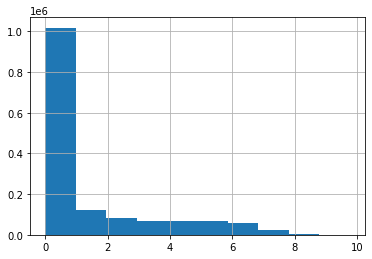

In [8]:
pxir.Idccdta.hist()

In [11]:
pxir.Idccdta.describe()

count    1.504513e+06
mean     1.256454e+00
std      1.998649e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.862961e+00
max      9.766766e+00
Name: Idccdta, dtype: float64

In [12]:
pxir.Idccdta.max()

9.766766

<AxesSubplot:>

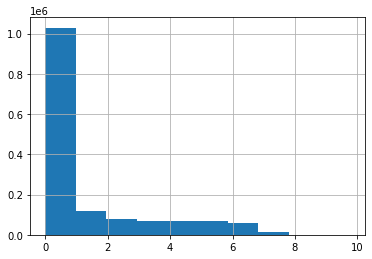

In [9]:
pxir.Idccdt.hist()

In [13]:
pxir.Idccdt.describe()

count    1.504513e+06
mean     1.226333e+00
std      1.964123e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.757265e+00
max      9.758335e+00
Name: Idccdt, dtype: float64

<AxesSubplot:>

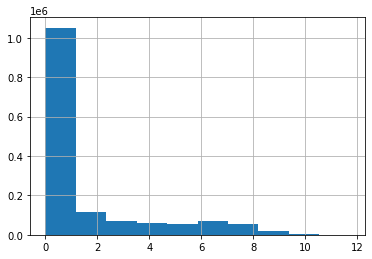

In [10]:
pxir.Idcpsi.hist()

In [14]:
pxir.Idcpsi.describe()

count    1.503821e+06
mean     1.427087e+00
std      2.379278e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.884035e+00
max      1.171618e+01
Name: Idcpsi, dtype: float64